#Input code



In [1]:
from IPython.core.display import TextDisplayObject
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import csv
from pathlib import Path
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
from scipy.spatial import distance
import os
import math
import statistics

In [2]:
# Setting filepath to all data folders
%store -r fp_folder
fp_targets = fp_folder+'Target_Data/'

In [3]:
def calc_dist(target):
  dist_list = []
  fp_file = fp_targets +'all_'+target+'_results.csv'
  df = pd.read_csv(fp_file)
  df = df[:-1]
  P_list = df["Participant"].unique()
  for PID in P_list:
    df_P = df[df['Participant']==PID]
    dist = 0
    for i in range(1,4):
      df_block = df_P[df_P['Block_num']==i]
      df_block['helpercol'] = (df_block['X']**2 +df_block['Z']**2 )**.5
      df_block['cumDist'] = df_block['helpercol'].cumsum()
      dist = df_block['cumDist'].iloc[-1]
      dist_list.append(dist)
  mean_val = statistics.mean(dist_list)
  return mean_val
    

In [4]:
def calc_min(target):
  dist_list = []
  fp_file = fp_targets +'all_'+target+'_results.csv'
  df = pd.read_csv(fp_file)
  df = df[:-1]
  P_list = df["Participant"].unique()
  for PID in P_list:
    df_P = df[df['Participant']==PID]
    dist = 0
    for i in range(1,4):
      df_block = df_P[df_P['Block_num']==i]
      df_block['helpercol'] = (df_block['X']**2 +df_block['Z']**2 )**.5
      df_block['cumDist'] = df_block['helpercol'].cumsum()
      dist = df_block['cumDist'].iloc[-1]
      dist_list.append(dist)
  min_val = min(dist_list)
  return min_val

In [5]:
df_mean = pd.DataFrame()
df_min = pd.DataFrame()

In [6]:
target_list = ['Automobile shop', 'Police station ', 'Fire Station', 'Bank', 'Pawn Shop', 'Pizzeria', 'Quattroki Restaurant', 'High School']
for target in target_list:
    df_mean[target] = [calc_dist(target)]
    df_min[target] = [calc_min(target)]
df_mean.to_csv(fp_targets+'mean_distance_by_target.csv', index=True, header = True)
df_min.to_csv(fp_targets+'min_distance_by_target.csv', index=True, header = True)

/var/folders/vd/hgkjsb1j7gj04s6dypg9lc0c0000gn/T/ipykernel_13743/3089082105.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['helpercol'] = (df_block['X']**2 +df_block['Z']**2 )**.5
/var/folders/vd/hgkjsb1j7gj04s6dypg9lc0c0000gn/T/ipykernel_13743/3089082105.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['cumDist'] = df_block['helpercol'].cumsum()
/var/folders/vd/hgkjsb1j7gj04s6dypg9lc0c0000gn/T/ipykernel_13743/3089082105.py:12: SettingWithCopyWarning: 
A value is trying to be set

In [7]:
def find_min(target):
  fp_file = fp_targets +'all_'+target+'_results.csv'
  df = pd.read_csv(fp_file)
  df = df[:-1]
  P_list = df["Participant"].unique()
  for PID in P_list:
    df_P = df[df['Participant']==PID]
    dist = 0
    for i in range(1,4):
      df_block = df_P[df_P['Block_num']==i]
      df_block['helpercol'] = (df_block['X']**2 +df_block['Z']**2 )**.5
      df_block['cumDist'] = df_block['helpercol'].cumsum()
      dist = df_block['cumDist'].iloc[-1]
      if dist == df_min[target].iloc[0]:
        return [PID, i]
        break

In [8]:
target_list = ['Automobile shop', 'Police station ', 'Fire Station', 'Bank', 'Pawn Shop', 'Pizzeria', 'Quattroki Restaurant', 'High School']
min_PI = pd.DataFrame()
for target in target_list:
    min_PI[target] = find_min(target)
min_PI.to_csv(fp_targets+'min_distance_participants.csv', index=True, header = True)

/var/folders/vd/hgkjsb1j7gj04s6dypg9lc0c0000gn/T/ipykernel_13743/3188323304.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['helpercol'] = (df_block['X']**2 +df_block['Z']**2 )**.5
/var/folders/vd/hgkjsb1j7gj04s6dypg9lc0c0000gn/T/ipykernel_13743/3188323304.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_block['cumDist'] = df_block['helpercol'].cumsum()
/var/folders/vd/hgkjsb1j7gj04s6dypg9lc0c0000gn/T/ipykernel_13743/3188323304.py:11: SettingWithCopyWarning: 
A value is trying to be set

In [9]:
if os.path.exists(fp_folder + '/Target_Data/min_results.csv')==True:
  os.remove(fp_folder + '/Target_Data/min_results.csv')

In [10]:
def save_min_data():
  target_list = ['Automobile shop', 'Police station ', 'Fire Station', 'Bank', 'Pawn Shop', 'Pizzeria', 'Quattroki Restaurant', 'High School']
  for target in target_list:
    PID = min_PI[target].iloc[0]
    block = min_PI[target].iloc[1]
    fp_file = fp_targets +'all_'+target+'_results.csv'
    df = pd.read_csv(fp_file)
    df = df[df['Participant']==PID]
    df = df[df['Block_num']==block]
    if os.path.exists(fp_folder + '/Target_Data/min_results.csv')==False:
      df.to_csv(fp_folder + '/Target_Data/min_results.csv', index=True)
      print('csv created')
    elif os.path.exists(fp_folder + '/Target_Data/min_results.csv')==True:
      df.to_csv(fp_folder + '/Target_Data/min_results.csv', index=True,mode='a', header=False)
save_min_data()

csv created


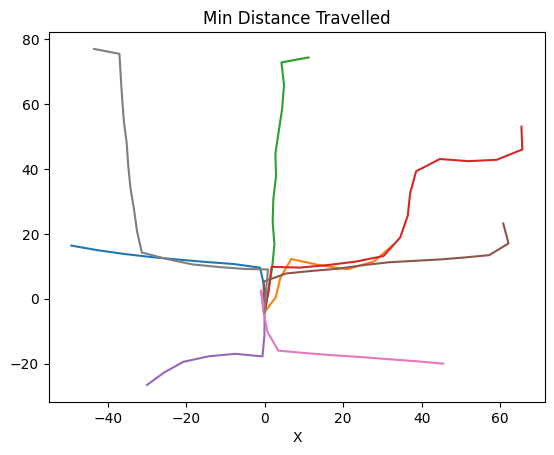

In [11]:
def GraphMin():
    fp_file = fp_folder + '/Target_Data/min_results.csv'
    df = pd.read_csv(fp_file)
    df = df[:-1]
    mp.title('Min Distance Travelled')
    #ax = mp.axes()
    df.set_index('X', inplace = True)
    #ax.set_xlabel('x position in maze')
    #ax.set_ylabel('y position in maze')
    #ax.set_xlim(-80,80)
    #ax.set_ylim(-60,80)
    ax = df.groupby('Target_Name')['Z'].plot(legend=False)
    imagepath = Path(fp_folder + '/Target_Data/maps/min_plot.png') 
    imagepath.parent.mkdir(parents=False, exist_ok=True)
    mp.savefig(imagepath)
GraphMin()